Jiangwei Wang 19364744 &
Xiaoxi Guo 46269544

## Julia part (5 marks)

Reproduce (at least part) of the scraping workflow you have done in R using Julia.

**you will need to do this in a new, separated notebook or in JuliaBox**

_hint_ this is the moment to go back to the Julia notebooks from the lab.

In [1]:
# add required packages
using Pkg 
#Pkg.add("HTTP")
#Pkg.add("Gumbo")
#Pkg.add("Cascadia")
using HTTP, Gumbo, Cascadia, DataFrames

This part is the same as what we did in R, to scrape the web pages from "https://www.photowarehouse.co.nz" that contains digital cameras only.

Let's scape one page first.

In [76]:
# define the web page we are going to do a web scraping
url = HTTP.get("https://www.photowarehouse.co.nz/shop/shop-by-product/digital-cameras/")

HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
Server: nginx
Date: Mon, 05 Oct 2020 01:20:36 GMT
Content-Type: text/html; charset=utf-8
Transfer-Encoding: chunked
Connection: keep-alive
X-Powered-By: PHP/7.1.33
Expires: Thu, 19 Nov 1981 08:52:00 GMT
Pragma: no-cache
Cache-Control: max-age=0, must-revalidate, no-transform, no-cache, no-store
Set-Cookie: PHPSESSID=72d67b8b8c551dba2a41adf5e0b189d7; expires=Mon, 19-Oct-2020 01:20:36 GMT; Max-Age=1209600; path=/; HttpOnly
Set-Cookie: PHPSESSID=72d67b8b8c551dba2a41adf5e0b189d7; expires=Mon, 19-Oct-2020 01:20:36 GMT; Max-Age=1209600; path=/; HttpOnly
Vary: Accept-Encoding

<!DOCTYPE html>
<html lang="en">
<head>
    
        <!-- Google Tag Manager -->
        <script>
            (
                function(w,d,s,l,i){
                    w[l]=w[l]||[];w[l].push(
                        {'gtm.start': new Date().getTime(),event:'gtm.js'}
                    );
                    var f=d.getElementsByTagName(s)[0],
                    j=d.createE

In [77]:
# parse url contents
parsed_page = url.body |>
  String |>
  parsehtml

HTML Document:
<!DOCTYPE html>
HTMLElement{:HTML}:<HTML lang="en">
  <head>
    <script>
            (
                function(w,d,s,l,i){
                    w[l]=w[l]||[];w[l].push(
                        {'gtm.start': new Date().getTime(),event:'gtm.js'}
                    );
                    var f=d.getElementsByTagName(s)[0],
                    j=d.createElement(s),
                    dl=l!='dataLayer'?'&l='+l:'';
                    j.async=true;
                    j.src='https://www.googletagmanager.com/gtm.js?id='+i+dl;
                    f.parentNode.insertBefore(j,f);
                }
            )(window,document,'script','dataLayer','GTM-MH6PNMQ');
            </script>
    <meta content="lerxrLkoeTb77yxJ7srlE_iovFqKFqQoeo6TucnDA5g" name="google-site-verification"/>
    <base href="https://www.photowarehouse.co.nz/"/>
    <link href="/shop/shop-by-product/digital-cameras/?showfulllist=1" rel="canonical"/>
...


In [79]:
# we create a selector to get the title we want
sel_for_link = Selector(".productTitle")
# and we extract each matching node in the XML document
link_page = eachmatch(sel_for_link, parsed_page.root)

10-element Array{HTMLNode,1}:
 HTMLElement{:a}:<a class="productTitle" href="/shop/shop-by-product/digital-cameras/full-frame-mirrorless/sony-a7c-deposit/" title="more information on Sony A7c Deposit">
  Sony A7c Deposit
</a>


 HTMLElement{:a}:<a class="productTitle" href="/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-28-60mm-black/" title="more information on Sony Alpha a7C Mirrorless + 28-60mm - Black">
  Sony Alpha a7C Mirrorless + 28-60mm - Black
</a>


 HTMLElement{:a}:<a class="productTitle" href="/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-28-60mm-silver/" title="more information on Sony Alpha a7C Mirrorless + 28-60mm - Silver">
  Sony Alpha a7C Mirrorless + 28-60mm - Silver
</a>


 HTMLElement{:a}:<a class="productTitle" href="/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-body-black/" title="more information on Sony Alpha a7C Mirrorless Bo

In [80]:
# extra a list of links
links = getattr.(link_page, "href")

10-element Array{String,1}:
 "/shop/shop-by-product/digital-cameras/full-frame-mirrorless/sony-a7c-deposit/"
 "/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-28-60mm-black/"
 "/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-28-60mm-silver/"
 "/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-body-black/"
 "/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-body-silver/"
 "/shop/shop-by-product/digital-cameras/full-frame-mirrorless/canon-eos-r6-mirrorless-24-105mm-f4-7-1-lens/"
 "/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/fujifilm-x-a7-camera-dark-silver-15-45mm-50-230-twin-kit/"
 "/shop/shop-by-product/digital-cameras/full-frame-mirrorless/panasonic-s5-20-60mm-f3-5-56-kit/"
 "/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/olympus-om-d-e-m10-mark-iv-mirrorless-digital-camera-w

In [81]:
# create a function to scrape titles from each link
function get_title(link)  
    title = nodeText(link)
    return title
end

get_title (generic function with 1 method)

In [86]:
# apply the function to extract title
title = map(get_title, link_page)

10-element Array{String,1}:
 "Sony A7c Deposit"
 "Sony Alpha a7C Mirrorless + 28-60mm - Black"
 "Sony Alpha a7C Mirrorless + 28-60mm - Silver"
 "Sony Alpha a7C Mirrorless Body - Black"
 "Sony Alpha a7C Mirrorless Body - Silver"
 "Canon EOS R6 Mirrorless + 24-105mm f/4-7.1 Lens"
 "Fujifilm X-A7 Camera ( Dark Silver ) 15-45mm / 50-230 twin kit"
 "Panasonic S5 20-60mm f3.5-56 kit"
 "Olympus OM-D E-M10 Mark IV Mirrorless Digital Camera with 14-150mm Lens (Black)"
 "Olympus OM-D E-M10 Mark IV Mirrorless Digital Camera with 14-150mm Lens (Silver)"

In [84]:
# we create a selector to get the price we want
sel_for_price = Selector(".price")
# and we extract each matching node in the XML document
price_page = eachmatch(sel_for_price,parsed_page.root)

10-element Array{HTMLNode,1}:
 HTMLElement{:div}:<div class="price pr1">
  <span class="exGST smallPrice">
    <span class="currencyHolder currencyHolderShort currency">
      <span class="currencySymbol">
        $
      </span>
    </span>
    260.87 excl. GST
  </span>
  <strong class="incGST bigPrice">
    <span class="currencyHolder currencyHolderShort currency">
      <span class="currencySymbol">
        $
      </span>
    </span>
    300.00
    <meta content="300" id="auto-payment-price-39167" itemprop="price"/>
    <meta content="NZD" itemprop="priceCurrency"/>
  </strong>
</div>
...

 HTMLElement{:div}:<div class="price pr1">
  <span class="exGST smallPrice">
    <span class="currencyHolder currencyHolderShort currency">
      <span class="currencySymbol">
        $
      </span>
    </span>
    3,737.39 excl. GST
  </span>
  <strong class="incGST bigPrice">
    <span class="currencyHolder currencyHolderShort currency">
      <span class="currencySymbol">
        $
      </s

In [85]:
# create a function to extract the price list
function get_price(price)
    price = nodeText(price)
    return price
end

get_price (generic function with 1 method)

In [87]:
# apply the function to extract price
price = map(get_price, price_page)

10-element Array{String,1}:
 "\$260.87 excl. GST\n                \$300.00\n                    \n                    "
 "\$3,737.39 excl. GST\n                \$4,298.00\n                    *"
 "\$3,737.39 excl. GST\n                \$4,298.00\n                    *"
 "\$3,215.65 excl. GST\n                \$3,698.00\n                    *"
 "\$3,215.65 excl. GST\n                \$3,698.00\n                    *"
 "\$4,773.04 excl. GST\n                \$5,489.00\n                    *"
 "\$956.52 excl. GST\n                \$1,100.00\n                    \n                    "
 "\$3,476.52 excl. GST\n                \$3,998.00\n                    *"
 "\$1,650.43 excl. GST\n                \$1,898.00\n                    *"
 "\$1,650.43 excl. GST\n                \$1,898.00\n                    *"

In [88]:
# define aother url to scrape all the cameras' specifications
const baseURL = "https://www.photowarehouse.co.nz"

"https://www.photowarehouse.co.nz"

In [89]:
# create a function to extract the specification part
function get_spec(link)
    response = HTTP.request("GET","$baseURL$link") # we read the right page glueing together the base url and the link we got before 
    parse_page = response.body |> String |> parsehtml
    sel_for_spec = Selector(".accordion")
    spec_page = eachmatch(sel_for_spec, parse_page.root)
    result_string = nodeText(spec_page[1])
    return result_string 
end

get_spec (generic function with 1 method)

In [90]:
# appply the function to get all the specification from each link
spec = map(get_spec,links)

10-element Array{String,1}:
 "\n                        Find other\n                        Sony Full Frame Mirrorless.\n                        or compare to other products in:Sony ❱\n                        Digital Cameras ❱\n                        Full Frame Mirrorless"
 "\n                    Specifications\n                Lens Mount ... Sony ECamera Format ... Full-Frame (1x Crop Factor)Pixels ... Actual: 25.3 MegapixelEffective: 24.2 MegapixelMaximum Resolution ... 6000 x 4000Aspect Ratio ... 1:1, 3:2, 4:3, 16:9Sensor Type ... CMOSSensor Size ... 35.6 x 23.8 mmImage File Format ... JPEG, RawBit Depth ... 14-BitImage Stabilization ... Sensor-Shift, 5-AxisExposure ControlISO Sensitivity ... Auto, 100 to 51200 (Extended: 50 to 204800)Shutter Speed ... Mechanical Shutter1/4000 to 30 SecondBulb ModeElectronic Shutter1/8000 to 30 SecondBulb ModeMetering Method ... Average, Center-Weighted Average, Highlight Weighted, Multi-Zone, SpotExposure Modes ... Aperture Priority, Manual, Progr

In [91]:
# finally, create a data frame to insert all the information we scraped so far
DSLR = DataFrame(Link = links, Title = title, Price = price, Spec = spec)

,Link
,String
1,/shop/shop-by-product/digital-cameras/full-frame-mirrorless/sony-a7c-deposit/
2,/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-28-60mm-black/
3,/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-28-60mm-silver/
4,/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-body-black/
5,/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-body-silver/
6,/shop/shop-by-product/digital-cameras/full-frame-mirrorless/canon-eos-r6-mirrorless-24-105mm-f4-7-1-lens/
7,/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/fujifilm-x-a7-camera-dark-silver-15-45mm-50-230-twin-kit/
8,/shop/shop-by-product/digital-cameras/full-frame-mirrorless/panasonic-s5-20-60mm-f3-5-56-kit/
9,/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/olympus-om-d-e-m10-mark-iv-mirrorless-digital-camera-with-14-150mm-lens-black/


We seem scraped all the information that we need from the single page successfully, now let's scrape all 39 pages of all digital cameras' information, just exactly what we have done in R.  

In [92]:
# create a function to generate a url list for thoese 39 pages
function url_list(i)
    result = join(["https://www.photowarehouse.co.nz/shop/shop-by-product/digital-cameras/", "?start=", i])
    return result    
end

url_list (generic function with 1 method)

In [93]:
# apply the function to generate the list
url = map(url_list, [0:10:380;])

39-element Array{String,1}:
 "https://www.photowarehouse.co.nz/shop/shop-by-product/digital-cameras/?start=0"
 "https://www.photowarehouse.co.nz/shop/shop-by-product/digital-cameras/?start=10"
 "https://www.photowarehouse.co.nz/shop/shop-by-product/digital-cameras/?start=20"
 "https://www.photowarehouse.co.nz/shop/shop-by-product/digital-cameras/?start=30"
 "https://www.photowarehouse.co.nz/shop/shop-by-product/digital-cameras/?start=40"
 "https://www.photowarehouse.co.nz/shop/shop-by-product/digital-cameras/?start=50"
 "https://www.photowarehouse.co.nz/shop/shop-by-product/digital-cameras/?start=60"
 "https://www.photowarehouse.co.nz/shop/shop-by-product/digital-cameras/?start=70"
 "https://www.photowarehouse.co.nz/shop/shop-by-product/digital-cameras/?start=80"
 "https://www.photowarehouse.co.nz/shop/shop-by-product/digital-cameras/?start=90"
 "https://www.photowarehouse.co.nz/shop/shop-by-product/digital-cameras/?start=100"
 "https://www.photowarehouse.co.nz/shop/shop-by-product/dig

In [94]:
# get response for each of the url page
my_url = map(HTTP.get, url)

39-element Array{HTTP.Messages.Response,1}:
 HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
Server: nginx
Date: Mon, 05 Oct 2020 01:34:33 GMT
Content-Type: text/html; charset=utf-8
Transfer-Encoding: chunked
Connection: keep-alive
X-Powered-By: PHP/7.1.33
Expires: Thu, 19 Nov 1981 08:52:00 GMT
Pragma: no-cache
Cache-Control: max-age=0, must-revalidate, no-transform, no-cache, no-store
Set-Cookie: PHPSESSID=5891df76ba3fc2a03c589f20799afb31; expires=Mon, 19-Oct-2020 01:34:33 GMT; Max-Age=1209600; path=/; HttpOnly
Set-Cookie: PHPSESSID=5891df76ba3fc2a03c589f20799afb31; expires=Mon, 19-Oct-2020 01:34:33 GMT; Max-Age=1209600; path=/; HttpOnly
Vary: Accept-Encoding

<!DOCTYPE html>
<html lang="en">
<head>
    
        <!-- Google Tag Manager -->
        <script>
            (
                function(w,d,s,l,i){
                    w[l]=w[l]||[];w[l].push(
                        {'gtm.start': new Date().getTime(),event:'gtm.js'}
                    );
                    var f=d.getElementsByT

In [95]:
# create a function to parese each page
function parse_page(url)
    result = url.body |>
      String |>
      parsehtml
    return result
end

parse_page (generic function with 1 method)

In [96]:
# apply the function to parse each page
parsed_page = map(parse_page, my_url)

39-element Array{HTMLDocument,1}:
 HTML Document:
<!DOCTYPE html>
HTMLElement{:HTML}:<HTML lang="en">
  <head>
    <script>
            (
                function(w,d,s,l,i){
                    w[l]=w[l]||[];w[l].push(
                        {'gtm.start': new Date().getTime(),event:'gtm.js'}
                    );
                    var f=d.getElementsByTagName(s)[0],
                    j=d.createElement(s),
                    dl=l!='dataLayer'?'&l='+l:'';
                    j.async=true;
                    j.src='https://www.googletagmanager.com/gtm.js?id='+i+dl;
                    f.parentNode.insertBefore(j,f);
                }
            )(window,document,'script','dataLayer','GTM-MH6PNMQ');
            </script>
    <meta content="lerxrLkoeTb77yxJ7srlE_iovFqKFqQoeo6TucnDA5g" name="google-site-verification"/>
    <base href="https://www.photowarehouse.co.nz/"/>
    <link href="/shop/shop-by-product/digital-cameras/?showfulllist=1" rel="canonical"/>
...

 HTML Document:
<!

In [103]:
# create a function to extract product title nodes of each camera
function element_page(page)
    # we create a selector to get the thing we want
    sel_for_link = Selector(".productTitle")
    # and we extract each matching node in the XML document
    link_page = eachmatch(sel_for_link, page.root)
    return link_page
end

element_page (generic function with 1 method)

In [100]:
# apply the function to extract each title and unlist the lists of list to a single list
link_page = collect(Iterators.flatten(map(element_page, parsed_page)))

386-element Array{HTMLNode,1}:
 HTMLElement{:a}:<a class="productTitle" href="/shop/shop-by-product/digital-cameras/full-frame-mirrorless/sony-a7c-deposit/" title="more information on Sony A7c Deposit">
  Sony A7c Deposit
</a>


 HTMLElement{:a}:<a class="productTitle" href="/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-28-60mm-black/" title="more information on Sony Alpha a7C Mirrorless + 28-60mm - Black">
  Sony Alpha a7C Mirrorless + 28-60mm - Black
</a>


 HTMLElement{:a}:<a class="productTitle" href="/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-28-60mm-silver/" title="more information on Sony Alpha a7C Mirrorless + 28-60mm - Silver">
  Sony Alpha a7C Mirrorless + 28-60mm - Silver
</a>


 HTMLElement{:a}:<a class="productTitle" href="/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-body-black/" title="more information on Sony Alpha a7C Mirrorless B

In [101]:
# extract link for each product
links = getattr.(link_page, "href")

386-element Array{String,1}:
 "/shop/shop-by-product/digital-cameras/full-frame-mirrorless/sony-a7c-deposit/"
 "/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-28-60mm-black/"
 "/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-28-60mm-silver/"
 "/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-body-black/"
 "/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-body-silver/"
 "/shop/shop-by-product/digital-cameras/full-frame-mirrorless/canon-eos-r6-mirrorless-24-105mm-f4-7-1-lens/"
 "/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/fujifilm-x-a7-camera-dark-silver-15-45mm-50-230-twin-kit/"
 "/shop/shop-by-product/digital-cameras/full-frame-mirrorless/panasonic-s5-20-60mm-f3-5-56-kit/"
 "/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/olympus-om-d-e-m10-mark-iv-mirrorless-digital-camera-

In [105]:
# create a function to extract all cameras' title
function get_title(link)  
    title = nodeText(link)
    return title
end

get_title (generic function with 1 method)

In [104]:
# apply the function to extract title
title = map(get_title, link_page)

386-element Array{String,1}:
 "Sony A7c Deposit"
 "Sony Alpha a7C Mirrorless + 28-60mm - Black"
 "Sony Alpha a7C Mirrorless + 28-60mm - Silver"
 "Sony Alpha a7C Mirrorless Body - Black"
 "Sony Alpha a7C Mirrorless Body - Silver"
 "Canon EOS R6 Mirrorless + 24-105mm f/4-7.1 Lens"
 "Fujifilm X-A7 Camera ( Dark Silver ) 15-45mm / 50-230 twin kit"
 "Panasonic S5 20-60mm f3.5-56 kit"
 "Olympus OM-D E-M10 Mark IV Mirrorless Digital Camera with 14-150mm Lens (Black)"
 "Olympus OM-D E-M10 Mark IV Mirrorless Digital Camera with 14-150mm Lens (Silver)"
 "Olympus OM-D E-M10 Mark IV Mirrorless Digital Camera with 14-42mm Lens (Silver)"
 "Olympus OM-D E-M10 Mark IV Mirrorless Digital Camera with 14-42mm Lens (Black)"
 "Olympus OM-D E-M10 Mark IV Mirrorless Digital Camera (Body Only, Black)"
 ⋮
 "SONY ALPHA  A6000 16-50mm f3.5-5.6 OSS"
 "SONY  DSC-RX100 Mk II20mp 3.6x Zeiss"
 "LEICA X2 16.1mp 24mm f2.8 - Black (35mm equivalent )"
 "MAMIYALEAF APTUS II 6 (28MP) BACK - Ex Demo"
 "PHASE ONE IQ180 80mp 

In [106]:
# create a function to extract the price part nodes
function price_element_page(page)
    # we create a selector to get the thing we want
    sel_for_link = Selector(".price")
    # and we extract each matching node in the XML document
    link_page = eachmatch(sel_for_link, page.root)
    return link_page
end

price_element_page (generic function with 1 method)

In [107]:
# apply the function to extract all price parts and unlist the lists of list to a single list
price_link_page = collect(Iterators.flatten(map(price_element_page, parsed_page)))

389-element Array{HTMLNode,1}:
 HTMLElement{:div}:<div class="price pr1">
  <span class="exGST smallPrice">
    <span class="currencyHolder currencyHolderShort currency">
      <span class="currencySymbol">
        $
      </span>
    </span>
    260.87 excl. GST
  </span>
  <strong class="incGST bigPrice">
    <span class="currencyHolder currencyHolderShort currency">
      <span class="currencySymbol">
        $
      </span>
    </span>
    300.00
    <meta content="300" id="auto-payment-price-39167" itemprop="price"/>
    <meta content="NZD" itemprop="priceCurrency"/>
  </strong>
</div>
...

 HTMLElement{:div}:<div class="price pr1">
  <span class="exGST smallPrice">
    <span class="currencyHolder currencyHolderShort currency">
      <span class="currencySymbol">
        $
      </span>
    </span>
    3,737.39 excl. GST
  </span>
  <strong class="incGST bigPrice">
    <span class="currencyHolder currencyHolderShort currency">
      <span class="currencySymbol">
        $
      </

In [108]:
# create a function to extract the useful part of the price nodes
function get_price(link)  
    price = nodeText(link)
    return price
end

get_price (generic function with 1 method)

In [109]:
# generate the function to extract price information 
price = map(get_price, price_link_page)

389-element Array{String,1}:
 "\$260.87 excl. GST\n                \$300.00\n                    \n                    "
 "\$3,737.39 excl. GST\n                \$4,298.00\n                    *"
 "\$3,737.39 excl. GST\n                \$4,298.00\n                    *"
 "\$3,215.65 excl. GST\n                \$3,698.00\n                    *"
 "\$3,215.65 excl. GST\n                \$3,698.00\n                    *"
 "\$4,773.04 excl. GST\n                \$5,489.00\n                    *"
 "\$956.52 excl. GST\n                \$1,100.00\n                    \n                    "
 "\$3,476.52 excl. GST\n                \$3,998.00\n                    *"
 "\$1,650.43 excl. GST\n                \$1,898.00\n                    *"
 "\$1,650.43 excl. GST\n                \$1,898.00\n                    *"
 "\$1,389.57 excl. GST\n                \$1,598.00\n                    *"
 "\$1,389.57 excl. GST\n                \$1,598.00\n                    *"
 "\$1,215.65 excl. GST\n           

In [110]:
# define another url to get ready to extract specification part of each product
const baseURL = "https://www.photowarehouse.co.nz"

"https://www.photowarehouse.co.nz"

In [111]:
# create a function to extract specification nodes based on the url above and products links we generated earlier
function get_spec(link)
    response = HTTP.request("GET","$baseURL$link") # we read the right page glueing together the base url and the link we got before 
    parse_page = response.body |> String |> parsehtml
    sel_for_spec = Selector(".accordion")
    spec_page = eachmatch(sel_for_spec, parse_page.root)
    result_string = nodeText(spec_page[1])
    return result_string 
end

get_spec (generic function with 1 method)

In [112]:
# apply the function to extract specification text
spec = map(get_spec,links)

386-element Array{String,1}:
 "\n                        Find other\n                        Sony Full Frame Mirrorless.\n                        or compare to other products in:Sony ❱\n                        Digital Cameras ❱\n                        Full Frame Mirrorless"
 "\n                    Specifications\n                Lens Mount ... Sony ECamera Format ... Full-Frame (1x Crop Factor)Pixels ... Actual: 25.3 MegapixelEffective: 24.2 MegapixelMaximum Resolution ... 6000 x 4000Aspect Ratio ... 1:1, 3:2, 4:3, 16:9Sensor Type ... CMOSSensor Size ... 35.6 x 23.8 mmImage File Format ... JPEG, RawBit Depth ... 14-BitImage Stabilization ... Sensor-Shift, 5-AxisExposure ControlISO Sensitivity ... Auto, 100 to 51200 (Extended: 50 to 204800)Shutter Speed ... Mechanical Shutter1/4000 to 30 SecondBulb ModeElectronic Shutter1/8000 to 30 SecondBulb ModeMetering Method ... Average, Center-Weighted Average, Highlight Weighted, Multi-Zone, SpotExposure Modes ... Aperture Priority, Manual, Prog

In [113]:
# lastly, insert all information we extracted from all 29 pages into a dataframe
DSLR = DataFrame(Link = links, Title = title, Price = price[:386], Spec = spec)

,Link
,String
1,/shop/shop-by-product/digital-cameras/full-frame-mirrorless/sony-a7c-deposit/
2,/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-28-60mm-black/
3,/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-28-60mm-silver/
4,/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-body-black/
5,/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/sony-alpha-a7c-mirrorless-body-silver/
6,/shop/shop-by-product/digital-cameras/full-frame-mirrorless/canon-eos-r6-mirrorless-24-105mm-f4-7-1-lens/
7,/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/fujifilm-x-a7-camera-dark-silver-15-45mm-50-230-twin-kit/
8,/shop/shop-by-product/digital-cameras/full-frame-mirrorless/panasonic-s5-20-60mm-f3-5-56-kit/
9,/shop/shop-by-product/digital-cameras/mirrorless-system-cameras-2/olympus-om-d-e-m10-mark-iv-mirrorless-digital-camera-with-14-150mm-lens-black/


Now we have the dataframe ready for further process.

The following part is to do a web scraping by using the API key. It is going to be the same as what we did in R, we are going to scrape weather forecasting data from Metservice again, by using the API key we applied through their website. We are going to scrape data from three major cities' stations in NZ.

In [114]:
# install JSON package since the data we are going to scrape is in JSON format
#Pkg.add("JSON")
using JSON

In [115]:
# define the API key we applied
my_API = "C4yrjkHUlDyZWvTjfGOtMhfFVoxI3Tdj"

"C4yrjkHUlDyZWvTjfGOtMhfFVoxI3Tdj"

In [116]:
# define the base url address we are going to scrape data from
url = "https://forecast.metoceanapi.com/ocean/gfs/site?"

"https://forecast.metoceanapi.com/ocean/gfs/site?"

In [117]:
# define Christchurch station link
site_time_CHC = "times=R168/20201002T190000Z/PT1H&lon=172.632&lat=-43.525&units=nautical"

"times=R168/20201002T190000Z/PT1H&lon=172.632&lat=-43.525&units=nautical"

In [118]:
# join all three elements together to form a url we are going to use for gathering the weather information from 
# Christchurch station
url_CHC = join([url, site_time_CHC, "&apikey=", my_API])

"https://forecast.metoceanapi.com/ocean/gfs/site?times=R168/20201002T190000Z/PT1H&lon=172.632&lat=-43.525&units=nautical&apikey=C4yrjkHUlDyZWvTjfGOtMhfFVoxI3Tdj"

In [207]:
# use HTTP.get to scrape data and apply JSON.parse to parse scraped JSON formatted data
r = HTTP.get(url_CHC)
data = JSON.parse(String(r.body))

Dict{String,Any} with 3 entries:
  "variables"  => Dict{String,Any}("sea_surface_below_8s_period_wave_significan…
  "dimensions" => Dict{String,Any}("time"=>168)
  "attributes" => Dict{String,Any}("data_extracted"=>"2020-10-05T02:56:25Z","mo…

In [208]:
# extract the data we need from the dataset
time_stamp = data["variables"]["time"]["data"]
wind_speed = data["variables"]["wind_speed_at_10m_above_ground_level"]["data"]
wind_direct = data["variables"]["wind_from_direction_at_10m_above_ground_level"]["data"]
precipitation = data["variables"]["precipitation_flux"]["data"]
air_temp = data["variables"]["air_temperature_at_2m_above_ground_level"]["data"]
visibility = data["variables"]["visibility_in_air"]["data"]

168-element Array{Any,1}:
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
  ⋮
 13.0318
 13.0317
 13.0316
 13.0316
 13.0316
 13.0316
 13.0317
 13.0318
 13.0319
 13.0318
 13.0317
 13.0316

In [209]:
# insert all data into one dataframe
data_CHC = DataFrame(time_stamp = time_stamp, wind_speed = wind_speed, wind_direct = wind_direct, 
    precipitation = precipitation, air_temp = air_temp, visibility = visibility)

,time_stamp,wind_speed,wind_direct,precipitation,air_temp,visibility
,Any,Any,Any,Any,Any,Any
1,2020-10-02T19:00:00Z,6.46652,336.5,,11.64,
2,2020-10-02T20:00:00Z,8.24838,335.7,,13.58,
3,2020-10-02T21:00:00Z,10.0302,334.9,,15.52,
4,2020-10-02T22:00:00Z,11.1901,330.733,,17.3067,
5,2020-10-02T23:00:00Z,12.3499,326.567,,19.0933,
6,2020-10-03T00:00:00Z,13.5097,322.4,,20.88,
7,2020-10-03T01:00:00Z,12.2786,315.9,,21.0333,
8,2020-10-03T02:00:00Z,11.0475,309.4,,21.1867,
9,2020-10-03T03:00:00Z,9.81642,302.9,,21.34,


In [210]:
# dealing with missing values, -99 for missing with a numerical appearing
data_CHC[:precipitation] = replace!(data_CHC[:precipitation], nothing => 0)
data_CHC[:visibility] = replace!(data_CHC[:visibility], nothing => -99)

168-element Array{Any,1}:
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
   ⋮
  13.0318
  13.0317
  13.0316
  13.0316
  13.0316
  13.0316
  13.0317
  13.0318
  13.0319
  13.0318
  13.0317
  13.0316

In [211]:
# add required package to deal with date
using Dates

In [212]:
# convert string to date and time type
for i = 1:168
    data_CHC[:time_stamp][i] = split(data_CHC[:time_stamp][i], "Z")[1]
    data_CHC[:time_stamp][i] = Dates.DateTime.(data_CHC[:time_stamp][i])
end

In [213]:
# convert all variables to correct data type
data_CHC[:time_stamp] = Dates.DateTime.(data_CHC[:time_stamp])
data_CHC[:wind_speed] = Float64.(data_CHC[:wind_speed])
data_CHC[:wind_direct] = Float64.(data_CHC[:wind_direct])
data_CHC[:precipitation] = Float64.(data_CHC[:precipitation])
data_CHC[:air_temp] = Float64.(data_CHC[:air_temp])
data_CHC[:visibility] = Float64.(data_CHC[:visibility])

168-element Array{Float64,1}:
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
   ⋮
  13.0318
  13.0317
  13.0316
  13.0316
  13.0316
  13.0316
  13.0317
  13.0318
  13.0319
  13.0318
  13.0317
  13.0316

In [214]:
# reshape the dataframe from wide to a long table
data_CHC_long = DataFrames.stack(data_CHC, 2:6)
colname_CHC = ["time_stamp", "measure", "CHC"]
rename!(data_CHC_long, colname_CHC)

,time_stamp,measure,CHC
,DateTime,Cat…,Float64
1,2020-10-02T19:00:00,wind_speed,6.46652
2,2020-10-02T20:00:00,wind_speed,8.24838
3,2020-10-02T21:00:00,wind_speed,10.0302
4,2020-10-02T22:00:00,wind_speed,11.1901
5,2020-10-02T23:00:00,wind_speed,12.3499
6,2020-10-03T00:00:00,wind_speed,13.5097
7,2020-10-03T01:00:00,wind_speed,12.2786
8,2020-10-03T02:00:00,wind_speed,11.0475
9,2020-10-03T03:00:00,wind_speed,9.81642


In [215]:
# add required pakages
using Query
using VegaLite
using Statistics

WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


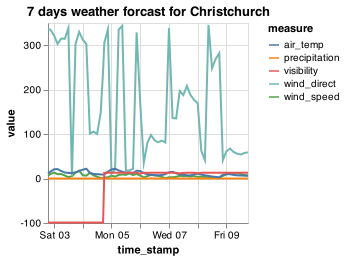

In [216]:
# group by date time and measurements and plot
CHC_Plot = by(DataFrame(data_CHC_long), [:time_stamp, :measure]) do group
    DataFrame(value = mean(group[!, :CHC]))
end
CHC_Plot |>
    @vlplot(:line, x=:time_stamp, y=:value, color=:measure,
    title="7 days weather forcast for Christchurch")

We can see air temperature, wind_speed are both steady. Visibility didn't change either after there are no missing values. Precipitation is 0 all the time and wind direction is going to change on Wednesday.
However, the wind direction is hard to visualized directly from this plot and it scales a quite large range of values, how about we plot without it?

WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


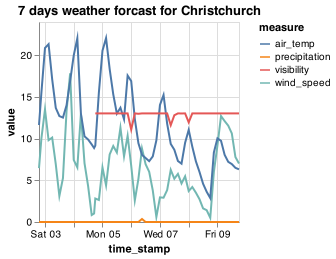

In [217]:
# plot without wind direction and missing visibility data
CHC_Plot1 = data_CHC_long |>
    @filter(_.measure != "wind_direct" && _.CHC != -99) |>
    DataFrame
CHC_Plot1 = by(DataFrame(CHC_Plot1), [:time_stamp, :measure]) do group
    DataFrame(value = mean(group[!, :CHC]))
end
CHC_Plot1 |>
    @vlplot(:line, x=:time_stamp, y=:value, color=:measure,
    title="7 days weather forcast for Christchurch")

Now it is pretty clear that wind speed is up and down between 17 and 0, the temperature is dropping to only around 7 on Friday. Visibility is steady apart from a few nights, while no shower or rain is forecasted in Christchurch for the next 7 days.

Now let's try Auckalnd station.

In [218]:
# define Auckland station link
site_time_AKL = "times=R168/20201002T190000Z/PT1H&lon=174.795&lat=-36.877&units=nautical"

"times=R168/20201002T190000Z/PT1H&lon=174.795&lat=-36.877&units=nautical"

In [219]:
# create an url to scrape Auckland station's weather data
url_AKL = join([url, site_time_AKL, "&apikey=", my_API])

"https://forecast.metoceanapi.com/ocean/gfs/site?times=R168/20201002T190000Z/PT1H&lon=174.795&lat=-36.877&units=nautical&apikey=C4yrjkHUlDyZWvTjfGOtMhfFVoxI3Tdj"

In [220]:
# scrape the data and parse it
r = HTTP.get(url_AKL)
data = JSON.parse(String(r.body))

Dict{String,Any} with 3 entries:
  "variables"  => Dict{String,Any}("sea_surface_below_8s_period_wave_significan…
  "dimensions" => Dict{String,Any}("time"=>168)
  "attributes" => Dict{String,Any}("data_extracted"=>"2020-10-05T02:57:18Z","mo…

In [221]:
# extract the data we need from the dataset
time_stamp = data["variables"]["time"]["data"]
wind_speed = data["variables"]["wind_speed_at_10m_above_ground_level"]["data"]
wind_direct = data["variables"]["wind_from_direction_at_10m_above_ground_level"]["data"]
precipitation = data["variables"]["precipitation_flux"]["data"]
air_temp = data["variables"]["air_temperature_at_2m_above_ground_level"]["data"]
visibility = data["variables"]["visibility_in_air"]["data"]

168-element Array{Any,1}:
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
  ⋮
 13.0318
 13.0317
 13.0316
 13.0316
 13.0316
 13.0316
 13.0317
 13.0318
 13.0319
 13.0318
 13.0317
 13.0316

In [222]:
# insert them into a dateframe
data_AKL = DataFrame(time_stamp = time_stamp, wind_speed = wind_speed, wind_direct = wind_direct, 
    precipitation = precipitation, air_temp = air_temp, visibility = visibility)

,time_stamp,wind_speed,wind_direct,precipitation,air_temp,visibility
,Any,Any,Any,Any,Any,Any
1,2020-10-02T19:00:00Z,2.31317,330.767,,12.6667,
2,2020-10-02T20:00:00Z,2.29374,337.233,,14.0233,
3,2020-10-02T21:00:00Z,2.2743,343.7,,15.38,
4,2020-10-02T22:00:00Z,2.58531,262.6,,16.38,
5,2020-10-02T23:00:00Z,2.89633,181.5,,17.38,
6,2020-10-03T00:00:00Z,3.20734,100.4,,18.38,
7,2020-10-03T01:00:00Z,3.21382,144.733,,18.36,
8,2020-10-03T02:00:00Z,3.2203,189.067,,18.34,
9,2020-10-03T03:00:00Z,3.22678,233.4,,18.32,


In [223]:
# dealing with missing values
data_AKL[:precipitation] = replace!(data_AKL[:precipitation], nothing => 0)
data_AKL[:visibility] = replace!(data_AKL[:visibility], nothing => -99)

168-element Array{Any,1}:
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
   ⋮
  13.0318
  13.0317
  13.0316
  13.0316
  13.0316
  13.0316
  13.0317
  13.0318
  13.0319
  13.0318
  13.0317
  13.0316

In [224]:
# convert string to date and time type
for i = 1:168
    data_AKL[:time_stamp][i] = split(data_AKL[:time_stamp][i], "Z")[1]
    data_AKL[:time_stamp][i] = Dates.DateTime.(data_AKL[:time_stamp][i])
end

In [225]:
# convert all columns into correct data type
data_AKL[:time_stamp] = Dates.DateTime.(data_AKL[:time_stamp])
data_AKL[:wind_speed] = Float64.(data_AKL[:wind_speed])
data_AKL[:wind_direct] = Float64.(data_AKL[:wind_direct])
data_AKL[:precipitation] = Float64.(data_AKL[:precipitation])
data_AKL[:air_temp] = Float64.(data_AKL[:air_temp])
data_AKL[:visibility] = Float64.(data_AKL[:visibility])

168-element Array{Float64,1}:
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
   ⋮
  13.0318
  13.0317
  13.0316
  13.0316
  13.0316
  13.0316
  13.0317
  13.0318
  13.0319
  13.0318
  13.0317
  13.0316

In [226]:
# reshape the dataframe from wide to a long table
data_AKL_long = DataFrames.stack(data_AKL, 2:6)
colname_AKL = ["time_stamp", "measure", "AKL"]
rename!(data_AKL_long, colname_AKL)

,time_stamp,measure,AKL
,DateTime,Cat…,Float64
1,2020-10-02T19:00:00,wind_speed,2.31317
2,2020-10-02T20:00:00,wind_speed,2.29374
3,2020-10-02T21:00:00,wind_speed,2.2743
4,2020-10-02T22:00:00,wind_speed,2.58531
5,2020-10-02T23:00:00,wind_speed,2.89633
6,2020-10-03T00:00:00,wind_speed,3.20734
7,2020-10-03T01:00:00,wind_speed,3.21382
8,2020-10-03T02:00:00,wind_speed,3.2203
9,2020-10-03T03:00:00,wind_speed,3.22678


WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


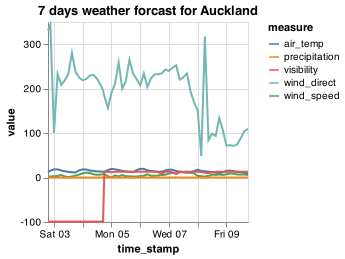

In [227]:
# group by date time and measurements and plot
AKL_Plot = by(DataFrame(data_AKL_long), [:time_stamp, :measure]) do group
    DataFrame(value = mean(group[!, :AKL]))
end
AKL_Plot |>
    @vlplot(:line, x=:time_stamp, y=:value, color=:measure,
    title="7 days weather forcast for Auckland")

In Auckland, wind direction is going to change from Thursday, the rest of the measurementes we can see in detail from the following plot.

WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


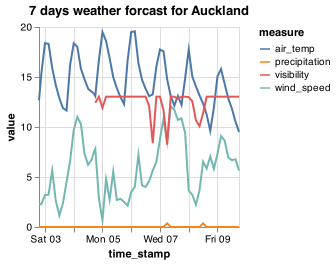

In [239]:
# plot without wind direction and missing visibility data
AKL_Plot1 = data_AKL_long |>
    @filter(_.measure != "wind_direct" && _.AKL != -99) |>
    DataFrame
AKL_Plot1 = by(DataFrame(AKL_Plot1), [:time_stamp, :measure]) do group
    DataFrame(value = mean(group[!, :AKL]))
end
AKL_Plot1 |>
    @vlplot(:line, x=:time_stamp, y=:value, color=:measure,
    title="7 days weather forcast for Auckland")

Air temperature is in a slightly decreasing slope, wind speed in peaking on Wednesday, visibility is dropping especially when the temperature is dropping as well, or there is shower forecasted on Wednesday and Thursday in Auckland.

Let's see what's going on regarding Wellington's weather.

In [228]:
# define Wellington station's link
site_time_WLG = "times=R168/20201002T190000Z/PT1H&lon=174.773&lat=-41.273&units=nautical"

"times=R168/20201002T190000Z/PT1H&lon=174.773&lat=-41.273&units=nautical"

In [229]:
# create an url to scrape Wellington weather forcast data
url_WLG = join([url, site_time_WLG, "&apikey=", my_API])

"https://forecast.metoceanapi.com/ocean/gfs/site?times=R168/20201002T190000Z/PT1H&lon=174.773&lat=-41.273&units=nautical&apikey=C4yrjkHUlDyZWvTjfGOtMhfFVoxI3Tdj"

In [230]:
# scrape and parse the data
r = HTTP.get(url_WLG)
data = JSON.parse(String(r.body))

Dict{String,Any} with 3 entries:
  "variables"  => Dict{String,Any}("sea_surface_below_8s_period_wave_significan…
  "dimensions" => Dict{String,Any}("time"=>168)
  "attributes" => Dict{String,Any}("data_extracted"=>"2020-10-05T02:58:17Z","mo…

In [240]:
# select the usefull information
time_stamp = data["variables"]["time"]["data"]
wind_speed = data["variables"]["wind_speed_at_10m_above_ground_level"]["data"]
wind_direct = data["variables"]["wind_from_direction_at_10m_above_ground_level"]["data"]
precipitation = data["variables"]["precipitation_flux"]["data"]
air_temp = data["variables"]["air_temperature_at_2m_above_ground_level"]["data"]
visibility = data["variables"]["visibility_in_air"]["data"]

168-element Array{Any,1}:
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
   nothing
  ⋮
 13.0318
 13.0317
 13.0316
 13.0316
 13.0316
 13.0316
 13.0317
 13.0318
 13.0319
 13.0318
 13.0317
 13.0316

In [241]:
# insert the data to a dataframe
data_WLG = DataFrame(time_stamp = time_stamp, wind_speed = wind_speed, wind_direct = wind_direct, 
    precipitation = precipitation, air_temp = air_temp, visibility = visibility)

,time_stamp,wind_speed,wind_direct,precipitation,air_temp,visibility
,Any,Any,Any,Any,Any,Any
1,2020-10-02T19:00:00Z,23.041,332.2,,12.7733,
2,2020-10-02T20:00:00Z,24.3499,329,,13.0567,
3,2020-10-02T21:00:00Z,25.6587,325.8,,13.34,
4,2020-10-02T22:00:00Z,24.7516,327.033,,13.5367,
5,2020-10-02T23:00:00Z,23.8445,328.267,,13.7333,
6,2020-10-03T00:00:00Z,22.9374,329.5,,13.93,
7,2020-10-03T01:00:00Z,22.3477,327.9,,13.9867,
8,2020-10-03T02:00:00Z,21.7581,326.3,,14.0433,
9,2020-10-03T03:00:00Z,21.1685,324.7,,14.1,


In [233]:
# dealing wtih missing values
data_WLG[:precipitation] = replace!(data_WLG[:precipitation], nothing => 0)
data_WLG[:visibility] = replace!(data_WLG[:visibility], nothing => -99)

168-element Array{Any,1}:
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
 -99
   ⋮
  13.0318
  13.0317
  13.0316
  13.0316
  13.0316
  13.0316
  13.0317
  13.0318
  13.0319
  13.0318
  13.0317
  13.0316

In [234]:
# convert string to date and time type
for i = 1:168
    data_WLG[:time_stamp][i] = split(data_WLG[:time_stamp][i], "Z")[1]
    data_WLG[:time_stamp][i] = Dates.DateTime.(data_WLG[:time_stamp][i])
end

In [235]:
# convert all columns into correct data type
data_WLG[:time_stamp] = Dates.DateTime.(data_WLG[:time_stamp])
data_WLG[:wind_speed] = Float64.(data_WLG[:wind_speed])
data_WLG[:wind_direct] = Float64.(data_WLG[:wind_direct])
data_WLG[:precipitation] = Float64.(data_WLG[:precipitation])
data_WLG[:air_temp] = Float64.(data_WLG[:air_temp])
data_WLG[:visibility] = Float64.(data_WLG[:visibility])

168-element Array{Float64,1}:
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
 -99.0
   ⋮
  13.0318
  13.0317
  13.0316
  13.0316
  13.0316
  13.0316
  13.0317
  13.0318
  13.0319
  13.0318
  13.0317
  13.0316

In [236]:
# reshape the dataframe from wide to a long table
data_WLG_long = DataFrames.stack(data_WLG, 2:6)
colname_WLG = ["time_stamp", "measure", "WLG"]
rename!(data_WLG_long, colname_WLG)

,time_stamp,measure,WLG
,DateTime,Cat…,Float64
1,2020-10-02T19:00:00,wind_speed,23.041
2,2020-10-02T20:00:00,wind_speed,24.3499
3,2020-10-02T21:00:00,wind_speed,25.6587
4,2020-10-02T22:00:00,wind_speed,24.7516
5,2020-10-02T23:00:00,wind_speed,23.8445
6,2020-10-03T00:00:00,wind_speed,22.9374
7,2020-10-03T01:00:00,wind_speed,22.3477
8,2020-10-03T02:00:00,wind_speed,21.7581
9,2020-10-03T03:00:00,wind_speed,21.1685


WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


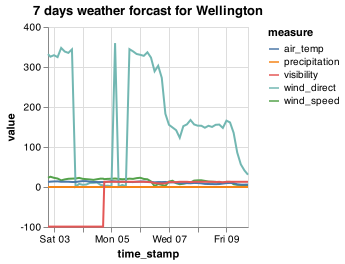

In [237]:
# group by date time and measurements and plot
WLG_Plot = by(DataFrame(data_WLG_long), [:time_stamp, :measure]) do group
    DataFrame(value = mean(group[!, :WLG]))
end
WLG_Plot |>
    @vlplot(:line, x=:time_stamp, y=:value, color=:measure,
    title="7 days weather forcast for Wellington")

We can see air temperature, wind_speed are both steady. Visibility didn't change either after there are no missing values. Precipitation is 0 all the time and wind direction is going to change after Wednesday.
However, the wind direction is hard to visualized directly from this plot and it scales a quite large range of values, how about we plot without it?

WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


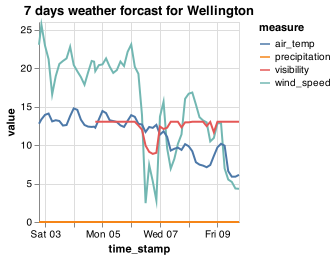

In [238]:
# plot without wind direction and missing visibility data
WLG_Plot1 = data_WLG_long |>
    @filter(_.measure != "wind_direct" && _.WLG != -99) |>
    DataFrame
WLG_Plot1 = by(DataFrame(WLG_Plot1), [:time_stamp, :measure]) do group
    DataFrame(value = mean(group[!, :WLG]))
end
WLG_Plot1 |>
    @vlplot(:line, x=:time_stamp, y=:value, color=:measure,
    title="7 days weather forcast for Wellington")

Now it is pretty clear that wind speed is going to slow down and the temperature is dropping to only around 6 in 7 days time. Visibility is dropping towards the end od Tuesday as the wind drops dramatically at the same time, while no shower or rain is forecasted in Wellington for the next 7 days.

Now, let's compare weather between cities.

In [259]:
# join CHC and AKL dataframes
data_CHC_AKL = join(data_CHC_long, data_AKL_long, on = [:time_stamp, :measure], kind = :left)

,time_stamp,measure,CHC,AKL
,DateTime,Cat…,Float64,Float64?
1,2020-10-02T19:00:00,wind_speed,6.46652,2.31317
2,2020-10-02T20:00:00,wind_speed,8.24838,2.29374
3,2020-10-02T21:00:00,wind_speed,10.0302,2.2743
4,2020-10-02T22:00:00,wind_speed,11.1901,2.58531
5,2020-10-02T23:00:00,wind_speed,12.3499,2.89633
6,2020-10-03T00:00:00,wind_speed,13.5097,3.20734
7,2020-10-03T01:00:00,wind_speed,12.2786,3.21382
8,2020-10-03T02:00:00,wind_speed,11.0475,3.2203
9,2020-10-03T03:00:00,wind_speed,9.81642,3.22678


In [260]:
# join WLG as wellto form a dataframe contains all three cities weather forcast data
data_CHC_AKL_WLG = join(data_CHC_AKL, data_WLG_long, on = [:time_stamp, :measure], kind = :left)

,time_stamp,measure,CHC,AKL,WLG
,DateTime,Cat…,Float64,Float64?,Float64?
1,2020-10-02T19:00:00,wind_speed,6.46652,2.31317,23.041
2,2020-10-02T20:00:00,wind_speed,8.24838,2.29374,24.3499
3,2020-10-02T21:00:00,wind_speed,10.0302,2.2743,25.6587
4,2020-10-02T22:00:00,wind_speed,11.1901,2.58531,24.7516
5,2020-10-02T23:00:00,wind_speed,12.3499,2.89633,23.8445
6,2020-10-03T00:00:00,wind_speed,13.5097,3.20734,22.9374
7,2020-10-03T01:00:00,wind_speed,12.2786,3.21382,22.3477
8,2020-10-03T02:00:00,wind_speed,11.0475,3.2203,21.7581
9,2020-10-03T03:00:00,wind_speed,9.81642,3.22678,21.1685


In [261]:
# reshape the dataframe from wide to long
data_long = DataFrames.stack(data_CHC_AKL_WLG, 3:5)
colname = ["time_stamp", "measure", "city", "value"]
rename!(data_long, colname)

,time_stamp,measure,city,value
,DateTime,Cat…,Cat…,Float64?
1,2020-10-02T19:00:00,wind_speed,CHC,6.46652
2,2020-10-02T20:00:00,wind_speed,CHC,8.24838
3,2020-10-02T21:00:00,wind_speed,CHC,10.0302
4,2020-10-02T22:00:00,wind_speed,CHC,11.1901
5,2020-10-02T23:00:00,wind_speed,CHC,12.3499
6,2020-10-03T00:00:00,wind_speed,CHC,13.5097
7,2020-10-03T01:00:00,wind_speed,CHC,12.2786
8,2020-10-03T02:00:00,wind_speed,CHC,11.0475
9,2020-10-03T03:00:00,wind_speed,CHC,9.81642


WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


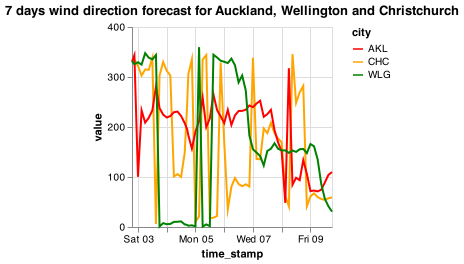

In [286]:
# plot wind direction for all three cities
wind_direct_plot = data_long |>
    @filter(_.measure == "wind_direct") |>
    DataFrame
wind_direct_plot = by(DataFrame(wind_direct_plot), [:time_stamp, :city]) do group
    DataFrame(value = mean(group[!, :value]))
end
wind_direct_plot |>
    @vlplot(:line, x=:time_stamp, y=:value, color={
    :city, scale={range=[:red, :orange, :green]}},
    title="7 days wind direction forecast for Auckland, Wellington and Christchurch")

Auckland starting with a cold southerly, then northerly and easterly towards the end. Wellington is mainly going to be northerly, from Tuesday night, it changes to southerly, then back to northerly on Friday. Christchurch is very similar to Wellington.

WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


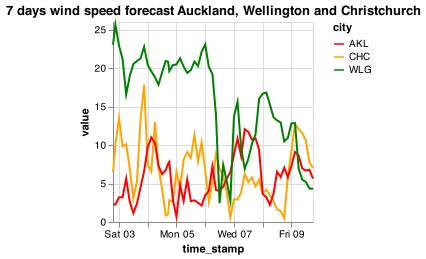

In [287]:
# plot wind speed for all three cities
wind_speed_plot = data_long |>
    @filter(_.measure == "wind_speed") |>
    DataFrame
wind_speed_plot = by(DataFrame(wind_speed_plot), [:time_stamp, :city]) do group
    DataFrame(value = mean(group[!, :value]))
end
wind_speed_plot |>
    @vlplot(:line, x=:time_stamp, y=:value, color={
    :city, scale={range=[:red, :orange, :green]}},
    title="7 days wind speed forecast Auckland, Wellington and Christchurch")

Clearly, Wellington has the fastest wind speed in general, which is common sense. Christchurch and Auckland are fluctuating in a very similar range, and both end up slightly more windy than Wellington on Friday.

WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


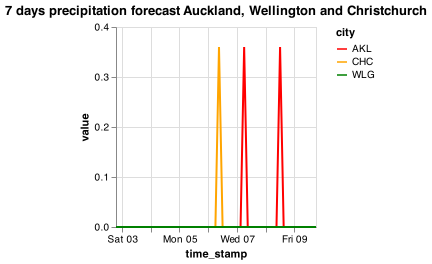

In [292]:
# plot precipitation for all three cities
precipitation_plot = data_long |>
    @filter(_.measure == "precipitation") |>
    DataFrame
precipitation_plot = by(DataFrame(precipitation_plot), [:time_stamp, :city]) do group
    DataFrame(value = mean(group[!, :value]))
end
precipitation_plot |>
    @vlplot(:line, x=:time_stamp, y=:value, color={
    :city, scale={range=[:red, :orange, :green]}},
    title="7 days precipitation forecast Auckland, Wellington and Christchurch")

Wellington has no rain forecasted. Christchurch and Auckland both have a short period of shower forecasted at a very similar level, which is 0.35mm per hour.

WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


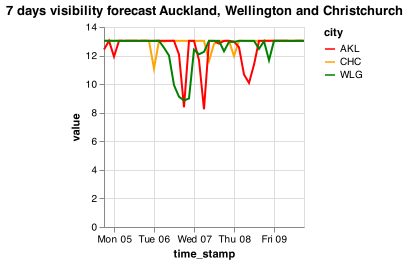

In [291]:
# plot visibility for all three cities
visibility_plot = data_long |>
    @filter(_.measure == "visibility" && _.value != -99) |>
    DataFrame
visibility_plot = by(DataFrame(visibility_plot), [:time_stamp, :city]) do group
    DataFrame(value = mean(group[!, :value]))
end
visibility_plot |>
    @vlplot(:line, x=:time_stamp, y=:value, color={
    :city, scale={range=[:red, :orange, :green]}},
    title="7 days visibility forecast Auckland, Wellington and Christchurch")

They all started off from Sunday night due to the missing values, visibility is dropping either night or dawn time, Auckland and Wellington both have similar decreasing levels, which are lower than Christchurch.

WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


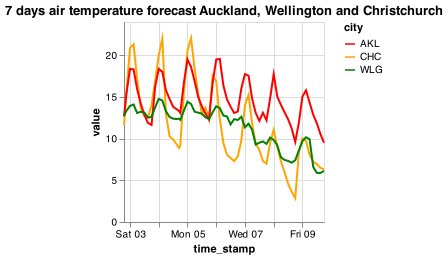

In [293]:
# plot air temperature for all three cities
air_temp_plot = data_long |>
    @filter(_.measure == "air_temp") |>
    DataFrame
air_temp_plot = by(DataFrame(air_temp_plot), [:time_stamp, :city]) do group
    DataFrame(value = mean(group[!, :value]))
end
air_temp_plot |>
    @vlplot(:line, x=:time_stamp, y=:value, color={
    :city, scale={range=[:red, :orange, :green]}},
    title="7 days air temperature forecast Auckland, Wellington and Christchurch")

They are fluctuating from night to day, however, they are all appearing a decreasing slope, where Auckland is more stable and remain as 10 degrees the lowest, while Christchurch and Wellington end up very similar as around 6 degrees.